<a href="https://colab.research.google.com/github/OptimizationExpert/Pyomo/blob/main/Linkedin_CP_Puzzle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Developed by Alireza Soroudi
alireza.soroudi@gmail.com

Linkedin News letter : https://www.linkedin.com/newsletters/optimization-in-open-source-6874020019009859585/

Git hub: https://github.com/OptimizationExpert/Pyomo

# Queens is a logic game where you need to fill the grid so that there is only one Queen per row, column, and colored region.

# **Rules**
*   Each row, column, and colored region must contain exactly one Crown symbol
*   Crown symbols cannot be placed in adjacent cells, including diagonally.

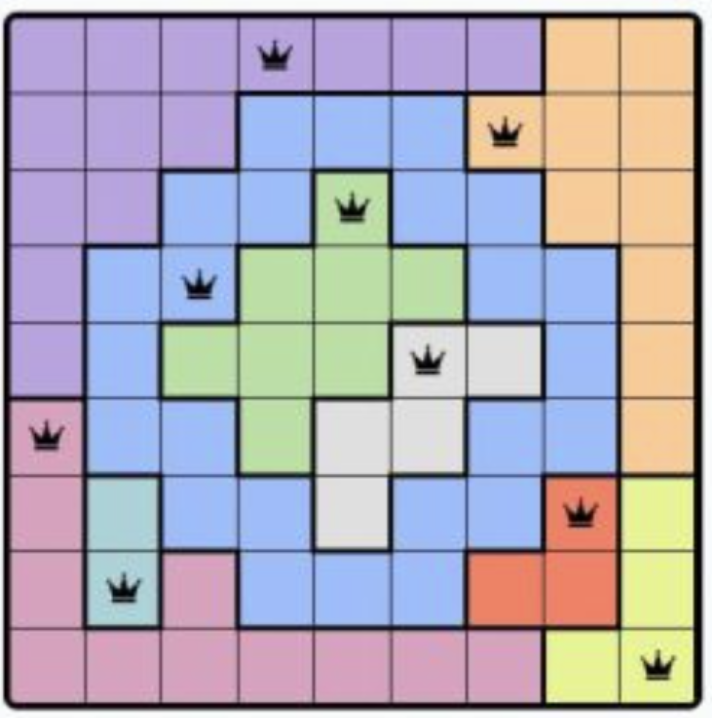

In [56]:
!pip install ortools
from ortools.sat.python import cp_model # CP-SAT solver
import numpy as np
from random import randint
import random
from math import ceil
import pandas as pd
import matplotlib.pyplot as plt # Data visualization
#plt.rcParams["figure.figsize"] = (15,10)

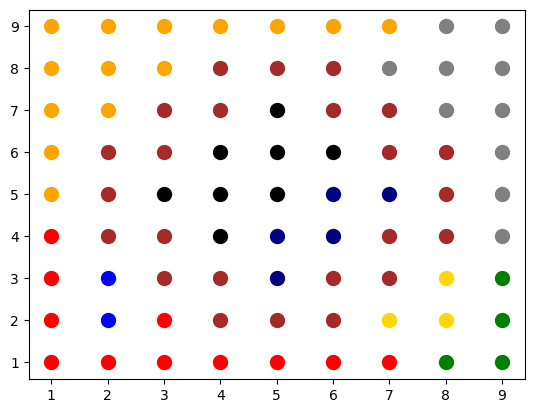

In [57]:
dic= {
    (1, 1): 0, (1, 2): 0, (1, 3): 0, (1, 4): 0, (1, 5): 0, (1, 6): 0, (1, 7): 0, (1, 8): 7, (1, 9): 7,
    (2, 1): 0, (2, 2): 0, (2, 3): 0, (2, 4): 8, (2, 5): 8, (2, 6): 8, (2, 7): 7, (2, 8): 7, (2, 9): 7,
    (3, 1): 0, (3, 2): 0, (3, 3): 8, (3, 4): 8, (3, 5): 2, (3, 6): 8, (3, 7): 8, (3, 8): 7, (3, 9): 7,
    (4, 1): 0, (4, 2): 8, (4, 3): 8, (4, 4): 2, (4, 5): 2, (4, 6): 2, (4, 7): 8, (4, 8): 8, (4, 9): 7,
    (5, 1): 0, (5, 2): 8, (5, 3): 2, (5, 4): 2, (5, 5): 2, (5, 6): 4, (5, 7): 4, (5, 8): 8, (5, 9): 7,
    (6, 1): 1, (6, 2): 8, (6, 3): 8, (6, 4): 2, (6, 5): 4, (6, 6): 4, (6, 7): 8, (6, 8): 8, (6, 9): 7,
    (7, 1): 1, (7, 2): 3, (7, 3): 8, (7, 4): 8, (7, 5): 4, (7, 6): 8, (7, 7): 8, (7, 8): 5, (7, 9): 6,
    (8, 1): 1, (8, 2): 3, (8, 3): 1, (8, 4): 8, (8, 5): 8, (8, 6): 8, (8, 7): 5, (8, 8): 5, (8, 9): 6,
    (9, 1): 1, (9, 2): 1, (9, 3): 1, (9, 4): 1, (9, 5): 1, (9, 6): 1, (9, 7): 1, (9, 8): 6, (9, 9): 6
}
KOLORs = ['r','k','b','navy','gold','g','grey','brown','orange']
info = {}
c= 0
for (i,j),v in dic.items():
  x,y = i,j
  plt.scatter(y,10-x,s=100, c= KOLORs[v-1])
  c+=1
  info[c] = (y,10-x,v)
plt.show()


In [58]:
N = len(dic)
info_color = {}
for c,(x,y,v) in info.items():
  info_color[v] = info_color.get(v,[])+[c]


In [59]:
class VarArraySolutionPrinter(cp_model.CpSolverSolutionCallback):
    """Print intermediate solutions."""

    def __init__(self, variables):
        cp_model.CpSolverSolutionCallback.__init__(self)
        self.__variables = variables
        self.__solution_count = 0


    def on_solution_callback(self):
        self.__solution_count += 1
        print(self.__solution_count , [self.Value(self.__variables[i]) for i in self.__variables])

    def solution_count(self):
        return self.__solution_count


model = cp_model.CpModel()
solver = cp_model.CpSolver()
nodes = range(1,N+1)
U = {c:model.NewBoolVar(f"queen_{c}") for c in nodes}
colors = info_color.keys()

for n in nodes:
  expressions = [U[n]]+[U[c] for c in nodes if n!=c and (info[n][0] - info[c][0])**2 +(info[n][1] - info[c][1])**2<2]
  model.AddAtMostOne(expressions)

for c in colors:
  expressions = [U[n] for n in nodes if info[n][2] == c]
  model.AddExactlyOne(expressions)

for x in range(1,10):
  expressions = [U[n] for n in nodes if info[n][0] == x]
  model.AddAtMostOne(expressions)

for y in range(1,10):
  expressions = [U[n] for n in nodes if info[n][1] == y]
  model.AddAtMostOne(expressions)

solver.parameters.enumerate_all_solutions = True
solution_printer = VarArraySolutionPrinter(U)
status = solver.Solve(model, solution_printer)
#solver.Solve(model)

1 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


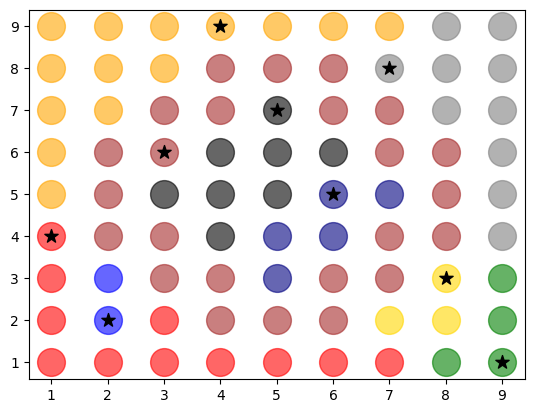

In [60]:
for c,(x,y,v) in info.items():
  plt.scatter(x,y,s=400, c= KOLORs[v-1], alpha= 0.6)

for i,v in U.items():
  if solver.Value(v) == 1:
    x,y = info[i][0],info[i][1]
    plt.scatter(x,y,s=100, c= 'k', marker='*')
plt.show()